# <b>Heart Disease Prediction Using Machine Learning</b>
<i>A Data Science project for CoderGirl using the <b>Heart Disease UCI dataset</b>: https://www.kaggle.com/ronitf/heart-disease-uci</i>.  


***  


## <b>Model Exploration</b>
This is a <i>supervised learning</i> problem since the model will be learning from the labels in the "target" column (0 = no disease; 1 = disease). It is also a <i>binary classification</i> problem since the goal is to train a model to predict a discrete value indicating whether a patient has heart disease or not.

<b>Import Libraries and Load the Data</b>

In [1]:
# packages used in phase 1 of project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# import ML packages
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# for KNN
from sklearn.neighbors import KNeighborsClassifier

# for logistic regression
from sklearn.linear_model import LogisticRegression

# for random forest
from sklearn.ensemble import RandomForestClassifier

# for permutation importance
import eli5
from eli5.sklearn import PermutationImportance

In [2]:
# import the deduped dataset
heart = pd.read_csv('heart_deduped.csv')

In [3]:
# verify there are 302 observations
print("Number of observations:", len(heart))

Number of observations: 302


<br /><b>Scaling the Data</b>

In [4]:
# split dataset into data and labels
heart_data = heart.drop(columns="target")
heart_labels = heart.iloc[:,-1]

In [5]:
# preview data head
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [6]:
# preview labels head
heart_labels.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [7]:
# use StandardScaler on the data
scaler = StandardScaler()
scaler.fit(heart_data)
heart_scaled = scaler.transform(heart_data)

C:\Users\veron\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\veron\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


<br /><b>Training/Testing Split</b>

In [8]:
# split dataset for training (80%) and testing (20%)
X_train, X_test, Y_train, Y_test = train_test_split(heart_scaled, heart_labels, test_size=0.20, random_state=42)

In [9]:
# view shape of train and test splits
# since the dataset has 302 observations, an 80/20 train/test split should be about 242/60 or 241/61 (depending on rounding)
print("Training observations:", len(X_train))
print("Testing observations:", len(X_test))


Training observations: 241
Testing observations: 61


In [10]:
# view scaled X_train data
X_train

array([[-1.3750206 ,  0.68265615,  0.0353515 , ...,  0.97951442,
        -0.71491124, -0.51399432],
       [ 1.50332164,  0.68265615,  1.005911  , ..., -0.64583368,
        -0.71491124,  1.11996657],
       [ 1.39261617,  0.68265615, -0.93520799, ..., -0.64583368,
         1.27497996,  1.11996657],
       ...,
       [ 1.61402711,  0.68265615,  1.97647049, ..., -0.64583368,
         0.28003436, -0.51399432],
       [ 0.72838335,  0.68265615,  1.97647049, ..., -0.64583368,
         1.27497996, -0.51399432],
       [ 0.94979429, -1.46486632,  0.0353515 , ...,  0.97951442,
         1.27497996, -0.51399432]])

### <br/><b>Model: K-Nearest Neighbors</b>

<b>Look for Optimal K Value</b>

In [11]:
# calculate the error for K values 1-49
error_vals = []
for i in range(1, 50):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train, Y_train)
    knn_predict = knn_model.predict(X_test)
    error_vals.append(np.mean(knn_predict != Y_test))

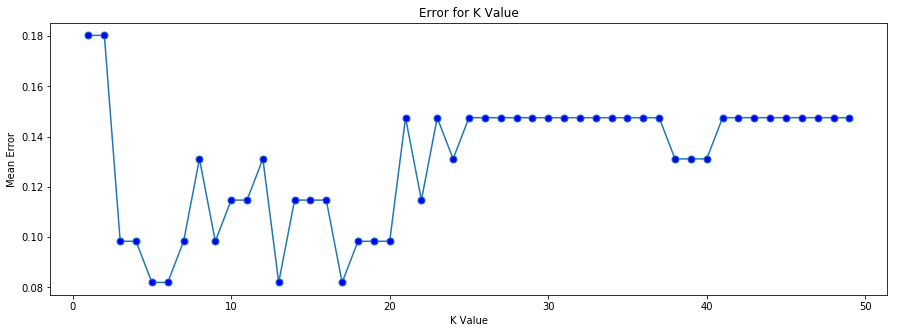

In [12]:
# plot the error for each K value
plt.figure(figsize=(15, 5))
plt.plot(range(1, 50), error_vals, marker="o", markerfacecolor="blue", markersize=7)
plt.title("Error for K Value")
plt.xlabel("K Value")
plt.ylabel("Mean Error")
plt.show()         

<b>Create the Model</b><br/>
Based on the above "elbow" graph, a K value of 5, 13, or 17 may yield the best results.

In [13]:
# create the classifier
knn_model = KNeighborsClassifier(n_neighbors=5)

# train the model
knn_model.fit(X_train, Y_train)

# predict the outputs
knn_predict = knn_model.predict(X_test)

<br/><b>Evaluate the Model</b>

In [14]:
# evalute the accuracy
knn_accuracy = round(accuracy_score(Y_test, knn_predict)*100, 2)
knn_f1 = round(f1_score(Y_test, knn_predict, average="weighted"), 2)

# print the results
print("K-Nearest Neighbors model accuracy:", str(knn_accuracy)+'%')
print("K-Nearest Neighbors model F1 score:", knn_f1)

K-Nearest Neighbors model accuracy: 91.8%
K-Nearest Neighbors model F1 score: 0.92


<i>Note: K values of 5, 13, and 17 yeilded the same accuracy and F1 score. 

In [15]:
# view the classification report
# no disease = 0; disease = 1
print(classification_report(knn_predict, Y_test))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92        32
           1       0.88      0.97      0.92        29

   micro avg       0.92      0.92      0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



<br/>

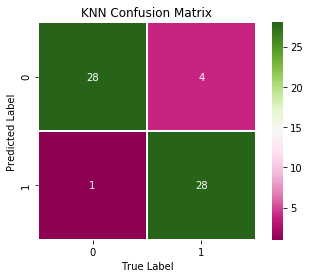

In [16]:
# view the confusion matrix
knn_mat = confusion_matrix(Y_test, knn_predict)
sns.heatmap(knn_mat.T, annot=True, cmap="PiYG", square=True, linewidths=.5)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.title("KNN Confusion Matrix");

<br/>

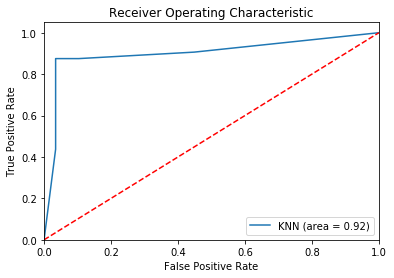

In [17]:
# plot the ROC curve
knn_roc_auc = roc_auc_score(Y_test, knn_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, knn_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label="KNN (area = %0.2f)" % knn_roc_auc)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show();

<br/><b>Cross Validation</b>

In [18]:
# create a new KNN model
knn_cv_model = KNeighborsClassifier(n_neighbors=5)

# train the model 
knn_cv_scores = cross_val_score(knn_cv_model, X_train, Y_train, cv=5)

# print each cv score (accuracy) and average them
print(knn_cv_scores)
print("KNN cross validation mean:{: .2%}".format(np.mean(knn_cv_scores)))

[0.73469388 0.87755102 0.85416667 0.85416667 0.80851064]
KNN cross validation mean: 82.58%


<br/><b>Tune Hyperparameters</b>

In [19]:
# create the classifier
knn_grid = KNeighborsClassifier()

# set the hyperparameters
params = {'n_neighbors':[5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39,41,55],
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1]}

# make the model
knn_grid_model = GridSearchCV(knn_grid, param_grid=params, n_jobs=1, cv=5)

# train the model
knn_grid_model.fit(X_train, Y_train)

# print the best hyperparameters
print("Best Hyperparameters for KNN:\n",knn_grid_model.best_params_)

# predict the outputs
knn_prediction = knn_grid_model.predict(X_test)

# print the results
print("Accuracy:", accuracy_score(knn_prediction, Y_test))
print("Confusion Metrix:\n", confusion_matrix(knn_prediction, Y_test))

Best Hyperparameters for KNN:
 {'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 5, 'weights': 'uniform'}
Accuracy: 0.9180327868852459
Confusion Metrix:
 [[28  4]
 [ 1 28]]


C:\Users\veron\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


<i>Result: no change in accuracy when compared to the original model.</i>

<br/><b>Check Feature Importance</b>

In [21]:
# check permutation importance to see which features are most important
knn_perm = PermutationImportance(knn_model, random_state=42).fit(X_test, Y_test)
eli5.show_weights(knn_perm, feature_names=["age", "sex", "cp", "trestbps", 
                                       "chol", "fbs", "restecg", "thalach", "exang", 
                                       "oldpeak", "slope", "ca", "thal"])

Weight,Feature
0.0787 ± 0.0321,ca
0.0721 ± 0.0572,thal
0.0557 ± 0.0334,trestbps
0.0525 ± 0.0321,age
0.0492 ± 0.0359,sex
0.0361 ± 0.0245,slope
0.0361 ± 0.0321,thalach
0.0361 ± 0.0245,restecg
0.0295 ± 0.0382,oldpeak
0.0295 ± 0.0131,fbs



***

### <b>Model: Logistic Regression</b>

<b>Create the Model</b><br/>

In [22]:
# create the classifier
lr_model = LogisticRegression(solver="liblinear")

# train the model
lr_model.fit(X_train, Y_train)

# predict the outputs
lr_predict = lr_model.predict(X_test)

<br/><b>Evaluate the Model</b>

In [23]:
# evalute the accuracy
lr_accuracy = round(accuracy_score(Y_test, lr_predict)*100, 2)
lr_f1 = round(f1_score(Y_test, lr_predict, average="weighted"), 2)

# print the results
print("Logistic Regression model accuracy:", str(lr_accuracy)+'%')
print("Logistic Regression model F1 score:", lr_f1)

Logistic Regression model accuracy: 81.97%
Logistic Regression model F1 score: 0.82


<br/>

In [24]:
# view the classification report
# no disease = 0; disease = 1
print(classification_report(lr_predict, Y_test))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81        30
           1       0.81      0.84      0.83        31

   micro avg       0.82      0.82      0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



<br/>

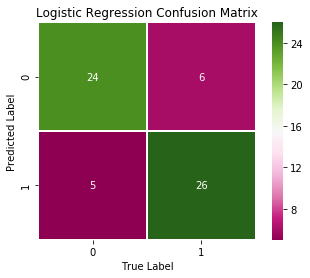

In [25]:
# view the confusion matrix
lr_mat = confusion_matrix(Y_test, lr_predict)
sns.heatmap(lr_mat.T, annot=True, cmap="PiYG", square=True, linewidths=.5)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.title("Logistic Regression Confusion Matrix");

<br/>

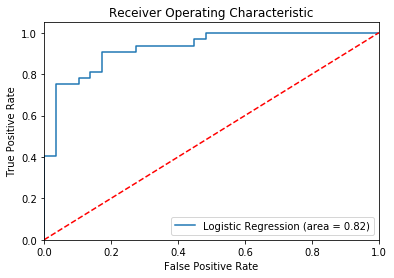

In [26]:
# plot the ROC curve
lr_roc_auc = roc_auc_score(Y_test, lr_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, lr_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % lr_roc_auc)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show();

<br/><b>Cross Validation</b>

In [27]:
# create a new logistic regression model
lr_cv_model = LogisticRegression(solver="liblinear")

# train the model 
lr_cv_scores = cross_val_score(lr_cv_model, X_train, Y_train, cv=20)

# print each cv score (accuracy) and average them
print(lr_cv_scores)
print("Logistic Regression cross validation mean:{: .2%}".format(np.mean(lr_cv_scores)))

[0.92307692 0.76923077 0.76923077 0.76923077 0.92307692 1.
 0.84615385 0.92307692 0.84615385 0.75       0.83333333 0.91666667
 0.90909091 0.81818182 0.81818182 0.90909091 0.63636364 1.
 0.81818182 0.63636364]
Logistic Regression cross validation mean: 84.07%


<br/><b>Tune Hyperparameters</b>

In [28]:
# create the classifier
lr_grid = LogisticRegression(solver="liblinear")

# set the hyperparameters
params = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}

# make the model
lr_grid_model = GridSearchCV(lr_grid, param_grid=params, n_jobs=1, cv=5)

# train the model
lr_grid_model.fit(X_train, Y_train)

# print the best hyperparameters
print("Best Hyperparameters for Logistic Regression:\n",lr_grid_model.best_params_)

# predict the outputs
lr_prediction = lr_grid_model.predict(X_test)

# print the results
print("Accuracy:", accuracy_score(lr_prediction, Y_test))
print("Confusion Metrix:\n", confusion_matrix(lr_prediction, Y_test))

Best Hyperparameters for Logistic Regression:
 {'C': 0.1, 'penalty': 'l2'}
Accuracy: 0.8524590163934426
Confusion Metrix:
 [[25  5]
 [ 4 27]]


C:\Users\veron\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


<i>Result: accuracy improved to 85.25% after hyperparameters tuned (accuracy of original model was 81.97%).</i>

<br/><b>Check Feature Importance</b>

In [29]:
# check permutation importance to see which features are most important
lr_perm = PermutationImportance(lr_model, random_state=42).fit(X_test, Y_test)
eli5.show_weights(lr_perm, feature_names=["age", "sex", "cp", "trestbps", 
                                       "chol", "fbs", "restecg", "thalach", "exang", 
                                       "oldpeak", "slope", "ca", "thal"])

Weight,Feature
0.0328 ± 0.0415,cp
0.0295 ± 0.0382,sex
0.0230 ± 0.0608,ca
0.0033 ± 0.0482,exang
-0.0033 ± 0.0840,thal
-0.0066 ± 0.0161,fbs
-0.0098 ± 0.0161,age
-0.0131 ± 0.0525,slope
-0.0131 ± 0.0382,thalach
-0.0131 ± 0.0131,chol


***

### <b>Model: Random Forest</b>

<b>Create the Model</b><br/>

In [30]:
# create the classifier
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)

# train the model
rf_model.fit(X_train, Y_train)

# predict the outputs
rf_predict = rf_model.predict(X_test)


<i>Note: n_estimators of 0, 50, and 100 were tried. 

<br/><b>Evaluate the Model</b>

In [31]:
# evalute the accuracy
rf_accuracy = round(accuracy_score(Y_test, rf_predict)*100, 2)
rf_f1 = round(f1_score(Y_test, rf_predict, average="weighted"), 2)

# print the results
print("Random Foreset model accuracy:", str(rf_accuracy)+'%')
print("Random Forest model F1 score:", rf_f1)

Random Foreset model accuracy: 90.16%
Random Forest model F1 score: 0.9


<br/>

In [32]:
# view the classification report
# no disease = 0; disease = 1
print(classification_report(rf_predict, Y_test))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90        31
           1       0.88      0.93      0.90        30

   micro avg       0.90      0.90      0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



<br/>

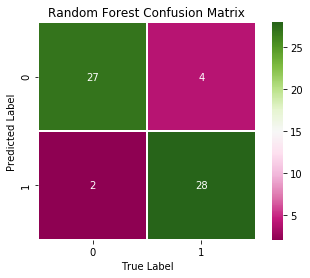

In [33]:
# view the confusion matrix
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(Y_test, rf_predict)
sns.heatmap(mat.T, annot=True, cmap="PiYG", square=True, linewidths=.5)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.title("Random Forest Confusion Matrix");

<br/>

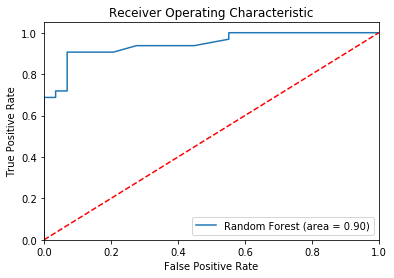

In [34]:
# plot the ROC curve
rf_roc_auc = roc_auc_score(Y_test, rf_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, rf_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label="Random Forest (area = %0.2f)" % rf_roc_auc)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show();

<br/><b>Cross Validation</b>

In [35]:
# create a new random forest model
rf_cv_model = RandomForestClassifier(n_estimators=50, random_state=42)

# train the model 
rf_cv_scores = cross_val_score(rf_cv_model, X_train, Y_train, cv=20)

# print each cv score (accuracy) and average them
print(rf_cv_scores)
print("Random Forest cross validation mean:{: .2%}".format(np.mean(rf_cv_scores)))

[0.84615385 0.76923077 0.84615385 0.84615385 0.84615385 0.92307692
 0.84615385 0.84615385 0.92307692 0.66666667 0.91666667 0.83333333
 0.63636364 0.81818182 0.72727273 0.90909091 0.72727273 0.90909091
 0.90909091 0.54545455]
Random Forest cross validation mean: 81.45%


<br/><b>Tune Hyperparameters</b>

In [36]:
# create the classifier
rf_grid = RandomForestClassifier(random_state=42)

# set the hyperparameters
params = {'bootstrap': [True, False], 
           'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
           'max_features': ['auto', 'sqrt'], 'min_samples_leaf': [1, 2, 4],
           'min_samples_split': [2, 5, 10], 
           'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}

# make the model
rf_grid_model = GridSearchCV(rf_grid, param_grid=params, cv=5)

# train the model
rf_grid_model.fit(X_train, Y_train)

# print the best hyperparameters
print("Best Hyperparameters for Random Forest:\n",rf_grid_model.best_params_)

# predict the outputs
rf_prediction = rf_grid_model.predict(X_test)

# print the results
print("Accuracy:", accuracy_score(rf_prediction, Y_test))
print("Confusion Metrix:\n", confusion_matrix(rf_prediction, Y_test))

Best Hyperparameters for Random Forest:
 {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Accuracy: 0.9016393442622951
Confusion Metrix:
 [[27  4]
 [ 2 28]]


C:\Users\veron\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


<i>Result: no change in accuracy when compared to the original model.</i>

<br/><b>Check Feature Importance</b>

In [37]:
# check permutation importance to see which features are most important
rf_perm = PermutationImportance(rf_model, random_state=42).fit(X_test, Y_test)
eli5.show_weights(rf_perm, feature_names=["age", "sex", "cp", "trestbps", "chol", 
                                       "fbs", "restecg", "thalach", "exang", 
                                       "oldpeak", "slope", "ca", "thal"])

Weight,Feature
0.1082 ± 0.0572,ca
0.0590 ± 0.0675,cp
0.0492 ± 0.0359,slope
0.0426 ± 0.0736,thal
0.0361 ± 0.0131,sex
0.0328 ± 0.0207,age
0.0295 ± 0.0382,thalach
0.0295 ± 0.0482,oldpeak
0.0230 ± 0.0334,exang
0.0230 ± 0.0161,fbs


***